<a href="https://colab.research.google.com/github/RodolfoFigueroa/madi2022-1/blob/main/Unidad_2/2_Analizando_Complejidad_en_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import numpy as np
import time
import networkx as nx

import matplotlib.pyplot as plt

En esta sesión veremos algunos ejemplos de algoritmos (unos nuevos, y otros que ya hemos visto) y analizaremos sus complejidades, ya sea en tiempo, memoria o ambas. Antes, es importante notar algo:

**NOTA:** Python utiliza por default `bigint` para representar enteros. Esto significa que los cálculos con números enteros siempre serán exactos, sin importar su magnitud. Sin embargo, las operaciones sobre `bigints` **no** son $O(1)$, ya que dependen de su tamaño.

Veamos un ejemplo de esto. La siguiente función calcula $n!$:

In [65]:
def my_fac(n):
    s = 1
    for i in range(1,int(n)+1):
        s *= i
    return s

Claramente, su complejidad es $O(n)$, por lo tanto, esperamos que su gráfica de tiempo vs. $n$ sea una línea recta. Sin embargo, ejecutándola para distintos valores de $n$ y midiendo su tiempo:

In [127]:
res = %timeit -o 1+1

6.97 ns ± 0.0959 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [64]:
times = []
ns = np.logspace(1, 5, 15)
for n in ns:
    res = %timeit -o my_fac(n)
    times.append(res.average)

585 ns ± 7.87 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.05 µs ± 25.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.1 µs ± 88.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.02 µs ± 109 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
9.23 µs ± 224 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
22.5 µs ± 976 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
65.5 µs ± 2.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
223 µs ± 7.69 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
782 µs ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.81 ms ± 78.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11 ms ± 447 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
41.7 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
166 ms ± 3.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
648 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 

Graficando:

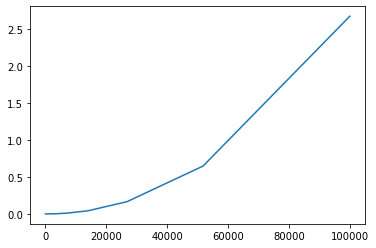

In [66]:
plt.plot(ns, times)

Vemos que la gráfica es curva en vez de recta. Para entender por qué pasa esto, usamos la función `bit_length` para ver cuántos bits de memoria ocupan distintos enteros:

In [68]:
enteros = [7, 15, 32, 1023, int(1e20)]
for i in enteros:
    print(f"Número de bits de {i}: {i.bit_length()}")

Número de bits de 7: 3
Número de bits de 15: 4
Número de bits de 32: 6
Número de bits de 1023: 10
Número de bits de 100000000000000000000: 67


Como puede verse, entre más grande el entero, más bits son necesarios para guardarlo. El problema es que la multiplicación de esta clase de números en Python tiene complejidad $O(n^2)$ (o $O(n^{1.58})$ para números muy grandes), donde $n$ es el número de bits. 

En la mayoría de los casos esto no representa un problema, ya que el tiempo de ejecución es tan bajo que bien podría ser constante. Sin embargo, como estamos multiplicando números hasta $100000!$ (que requiere de un total de 1516688 bits para poder representarse por completo), los costos de ejecución se vuelven mucho más evidentes.

En caso de que la precisión no sea tan importante, podemos solucionar este problema usando `float` en vez de `int`. Como `float` tiene un tamaño fijo de 64 bits, la multiplicación siempre toma un tiempo constante:

In [72]:
def my_fac_2(n):
    s = 1.0
    for i in range(1,int(n)+1):
        s *= i
    return s

In [73]:
times = []
ns = np.logspace(1, 5, 15)
for n in ns:
    res = %timeit -o my_fac_2(n)
    times.append(res.average)

614 ns ± 6.22 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.06 µs ± 47.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.79 µs ± 78.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
3.21 µs ± 73.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.18 µs ± 109 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
11.5 µs ± 633 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
23.1 µs ± 799 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
49 µs ± 2.37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
93.8 µs ± 3.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
177 µs ± 6.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
366 µs ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
710 µs ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.23 ms ± 21.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.46 ms ± 115 µs per loop (mean ± std. de

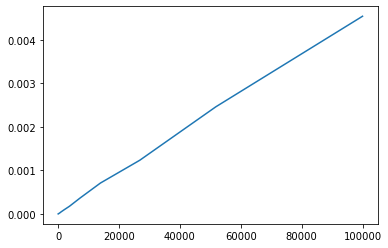

In [74]:
plt.plot(ns, times)

# Ejemplos

## Ejemplo 1

En la práctica de inducción, teníamos el siguiente problema:

Encuentra el valor de $$\Big\lfloor \frac{1}{2}\Big \rfloor + \Big\lfloor \frac{2}{2}\Big \rfloor + \cdots + \Big\lfloor \frac{n}{2}\Big \rfloor$$

Este problema se puede resolver de forma sencilla utilizando un bucle `for`:

In [86]:
def floor_sum(n):
    s = 0
    for i in range(n+1):
        s += i//2
    return s

En tiempo, es $O(n)$, pues estamos haciendo $n$ operaciones, una en cada ciclo. En memoria, es constante, pues lo único que tenemos que ir recordando es el valor de la suma en cada momento, es decir, es $O(1)$.

Nosotros habíamos encontrado una expresión cerrada para esta suma, con la cual podemos escribir otra función:

In [87]:
def floor_sum_2(n):
    return (n//2) * ((n+1)//2)

En este caso, la complejidad tanto en tiempo como en espacio es $O(1)$, ya que solo tenemos que realizar una operación sin importar el tamaño de la entrada.

## Ejemplo 2

Pasemos a un ejemplo más interesante. Supongamos que tenemos que diseñar un algoritmo tal que dado un entero positivo $n$ y un número real $x$, tenemos que encontrar el valor de $x^n$, pero utilizando únicamente operaciones básicas (suma, resta, multiplicación y división).

Un primer algoritmo para hacer esto sería lo siguiente:

In [92]:
def potencia(x, n):
    p = x
    for i in range(2, n+1):
        p *= x
    return p

potencia(2,10)

1024

¿Cuáles son las complejidades de este algoritmo? En tiempo, nos toma $O(n)$, pues estamos iterando $n$ veces y en cada una hacemos una cantidad constante de operaciones, mientras que es constante en memoria, pues sólo actualizamos el valor de $p$ en cada iteración. 

¿Cómo podemos optimizar este algoritmo? Notemos que si $n = 2k$, entonces $x^n = (x^k)^2$, mientras que si $n = 2k+1$, $x^n = (x^k)^2 \cdot x$. Usemos esto para obtener un algoritmo que sea mejor en cuanto a tiempo de ejecución.

In [94]:
def potencia_2(x, n):
    if n == 1:
        return x
    
    p = potencia_2(x, n//2)
    
    if n%2 == 0:
        return p*p
    else:
        return x*p*p

potencia_2(2, 10)

1024

El tiempo de ejecución disminuye considerablemente, pues hacemos un promedio de $log_2(n)$ iteraciones, en donde hacemos una cantidad constante de operaciones en cada iteración, por lo que la complejidad en tiempo del algoritmo es $O(log(n))$. Sin embargo, la complejidad en cuanto a memoria se ve afectada, ya que nuestra pila de recursión alcanza un promedio de $log_2(n)$ de profundidad, lo que hace que la complejidad de nuestro nuevo algoritmo en memoria sea $O(log(n))$.

Este ejemplo ilustra algo que es muy común en análisis de algoritmos, en muchas ocasiones es conveniente sacrificar un poco de memoria a cambio de una gran mejora en el tiempo de ejecución, pues bajar el tiempo de $O(n)$ a $O(log(n))$ es una gran mejora, mientras que aumentar la complejidad en espacio de $O(1)$ a $O(log(n))$ no es tan significativo. La programación dinámica nos permite trabajar situaciones similares, donde almacenar valores suele ser muy conveniente para poder mejorar el tiempo de ejecución de los algoritmos.

## Ejemplo 3

Recordemos una sucesión de la que hemos hablado en el pasado: la sucesión de Fibonacci. Supongamos que se nos pide encontrar el $n-$ésimo valor de esta sucesión, es decir, $F_n$.

Un primer algoritmo para hacer esto, sería hacer una recursión que calcule los valores de Fibonacci:

In [96]:
def fib(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fib(n-1) + fib(n-2)

fib(8)

21

¿Cuáles son las complejidades de este algoritmo? Notemos que la pila de recursión tiene como longitud máxima $n$, y como no guardamos variables, se concluye que la complejidad en memoria del algoritmo es $O(n)$. Ahora, como para cada $n > 1$, requerimos llamar a la función `fib` dos veces, se concluye que la complejidad en tiempo es $O(2^n)$.

¿Cómo mejorar esto? ¿Qué pasa si guardamos los valores de los números de Fibonacci que vamos calculando? Es decir, guardamos el valor de $F_k$ la primera vez que llamemos a $fib(k)$.

In [113]:
def fib2(k, Fs=None):
    if Fs is None:
        Fs = [None] * (k+1)

    if k == 0:
        return 0
    elif k == 1:
        return 1
    
    if Fs[k] is not None:
        return Fs[k]
    else:
        Fs[k] = fib2(k-1, Fs=Fs) + fib2(k-2, Fs=Fs) 
        return Fs[k]

fib2(8)

21

¿Cuáles son las complejidades de este algoritmo? En cuanto a memoria, tenemos lo mismo que en el algoritmo anterior en la pila de recursión, y además estamos agregando $Fs[]$, pero tiene una cantidad lineal de entradas, por lo que la complejidad en espacio sigue siendo $O(n)$. La complejidad en tiempo mejora considerablemente, pues ahora $fib(k)$ llama a $fib(k-1), fib(k-2)$ únicamente una vez,  lo que permite que la complejidad ahora sea $O(n)$.

A esta técnica de guardar los resultados de una función para utilizarlos después se le conoce como *memoización*.

Estos algoritmos nos permiten encontrar el valor de $F_n$ de manera recursiva, ¿lo podemos hacer de forma iterativa? Es decir, de atrás para adelante. Sí podemos:

In [114]:
def fib3(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    
    c = 1
    k1 = 0
    k2 = 1
    while c != n:
        t = k1
        k1 = k2
        k2 = t + k1
        c = c+1
    return k2

fib3(8)

21

¿Cuáles son las complejidades de este algoritmo? En cuanto a memoria, notemos que ocupamos constante en la pila de recursión (llamamos sólo una vez a $fib3(n)$), y nuestras únicas variables son $c, k1, k2$, por lo que la complejidad en espacio es $O(1)$. La complejidad en tiempo es $O(n)$, pues hacemos el $while$ hasta llegar a $n$, sumando $1$ a $c$ en cada paso. 

Esto nos muestra algo que también es bastante común, hacer un algoritmo de forma iterativa suele hacerlo más eficiente, ya sea en espacio, en tiempo o ambas. Sin embargo, muchas veces es muy complicado pasar de algo recursivo a algo iterativo.

## Ejemplo 4

Analicemos las complejidades de el algoritmo de DFS, que vimos anteriormente. Recordemos el cómo era este algoritmo, exploramos los caminos de la gráfica hasta llegar a algún vértice que ya había sido visitado, y nos regresamos al vértice anterior para continuar explorando:

[(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 2), (1, 4), (1, 7), (3, 4), (4, 5)] 



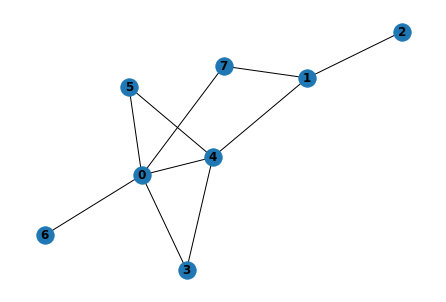

In [120]:
n = 8
p = 1/3

G = nx.gnp_random_graph(n, p)
print(G.edges, '\n')
nx.draw(G, with_labels=True, font_weight='bold')

In [121]:
def dfs(g, v, visited=None):
    if visited is None:
        visited = [False] * len(g.nodes)
        
    visited[v] = True
    print(v) # Aquí puede ir cualquier otra cosa
    for u in g.adj[v]:
        if not visited[u]:
            dfs(g, u, visited)
            
dfs(G, 0)

0
3
4
1
2
7
5
6


Estamos analizando la complejidad únicamente del algoritmo, es decir, podemos omitir por el momento el espacio que ocupa la gráfica $G$ por sí misma. Sea $n$ la cantidad de vértices y $m$ la cantidad de aristas. En cuanto a memoria, tenemos el vector `visited` que guarda $n$ valores, y en cuanto a la pila de recursión, podría darse el caso en el que se llegue a una profundidad de $n$, entonces, la complejidad en espacio es $O(n)$. Para la complejidad en tiempo, notemos que cada arista puede ser usada a lo más una vez, y exploramos a partir de cada vértice exactamente una vez, por lo que la complejidad en tiempo de DFS es $O(n + m)$.

# Ejercicios

## Ejercicio 1

Determina las complejidades en tiempo y espacio del algoritmo de BFS visto en clases pasadas:

In [122]:
from collections import deque

def bfs(g, v):
    visited = [False] * len(g.nodes)
    q = deque()
    visited[v] = True
    q.append(v)
    
    while(q):
        u = q.popleft()
        print(u) # Pueden hacer lo que quieran
        for w in g.adj[u]:
            if not visited[w]:
                visited[w] = True
                q.append(w)

*Aquí va tu demostración*

## Ejercicio 2

Considera el siguiente problema: Dado un entero $n$, encuentra el valor de $1! + 2! + \cdots + n!$. 

  a)   Describe e implementa un algoritmo que tenga complejidad $O(1)$ en espacio, ¿cuál es su complejidad en tiempo? 
  
  b)   Describe e implementa un algoritmo que tenga complejidad $O(n)$ en tiempo, ¿cuál es su complejidad en espacio?

a) *Describe aquí el algoritmo solicitado*

In [123]:
#(Aquí va el código de la implementación del algoritmo que describiste en la celda anterior)

b) *Describe aquí el algoritmo solicitado.*

In [ ]:
#(Aquí va el código de la implementación del algoritmo que describiste en la celda anterior)